<a href="https://colab.research.google.com/github/laaksonenl/machine-learning/blob/master/random_statistics_scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'Hypothesis = event has a probability of 60% or more'

'The probability of this hypothesis 0.1'

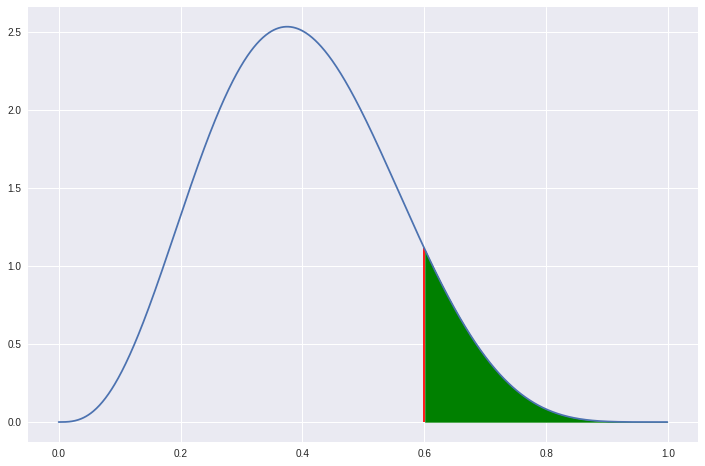

In [1]:
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 4.0
beta_ = 6.0
p_limit = 0.6

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

x = np.arange (0, 1, 0.001)
y = beta(alpha, beta_)

plt.vlines(x=p_limit, ymin=0, ymax=y.pdf(p_limit), color='red')
plt.fill_between(x, y.pdf(x), where = x > p_limit, color='g')
plt.plot(x,y.pdf(x))

display('Hypothesis = event has a probability of 60% or more')
display('The probability of this hypothesis {:.1f}'.format(1 - y.cdf(p_limit)))

'Probability of interval 0.31'

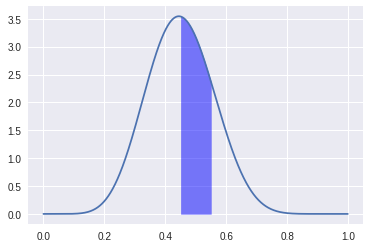

In [2]:
alpha = 9.0
beta_ = 11.0

y = beta(alpha, beta_)

limit = 0.5
deviation = 0.05
plt.fill_between(x, y.pdf(x), where=(x > limit - deviation) & (x <= limit + deviation), color='b', alpha=0.5)
plt.plot(x,y.pdf(x))

display('Probability of interval {:.2}'.format(y.cdf(limit + deviation) - y.cdf(limit - deviation)))

(0.04255999999999998, 4.725109192804664e-16)


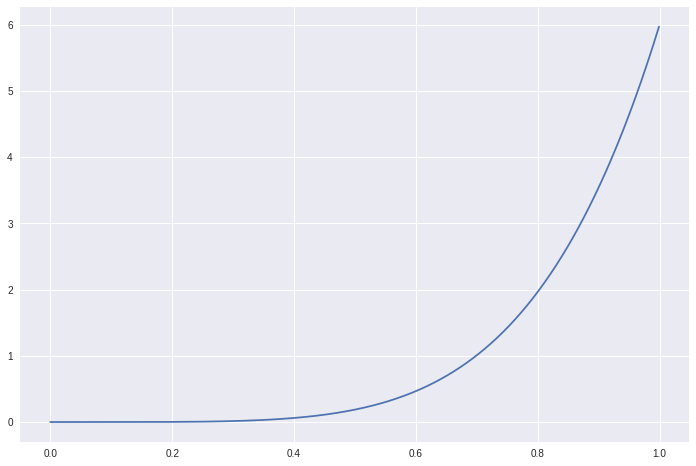

In [3]:
# 6 heads
# and then 1 tail
alpha = 6
beta_ = 1

x = np.arange (0, 1, 0.001)
y = beta(alpha, beta_)

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(x,y.pdf(x))

# True probability of getting heads between 0.4 and 0.6 is
from scipy import integrate
result = integrate.quad(lambda x: y.pdf(x), 0.4, 0.6)
print(result)
# 0.0425 of chance that coin is fair (probability of heads is between 0.4 and 0.6)

(0.9527469094270802, 1.4524663022109647e-11)


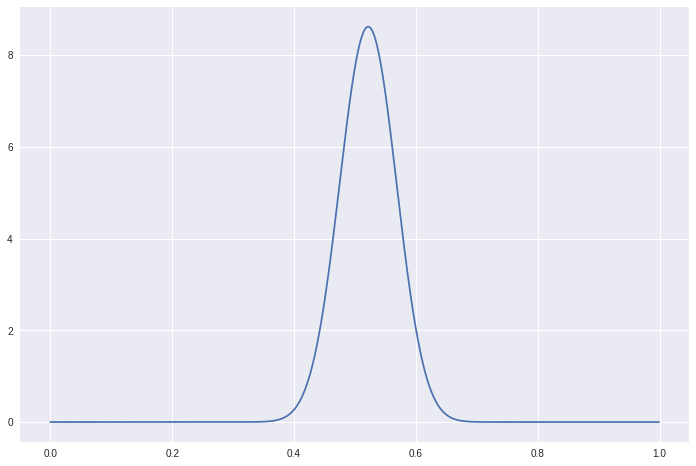

In [4]:
# Prior = coin is fair
# There should be at least 95% chance true rate being between 0.4 and 0.6
# The larger the alpha and beta values are, the stronger and reliable the prior belief is
prior_alpha = 55
prior_beta = 55
heads = 6
tails = 1

posterior = beta(prior_alpha + heads, prior_beta + tails)
plt.plot(x, posterior.pdf(x))

from scipy import integrate
result = integrate.quad(lambda x: posterior.pdf(x), 0.4, 0.6)
print(result) 

(0.49540589807539454, 5.246459098360555e-11)


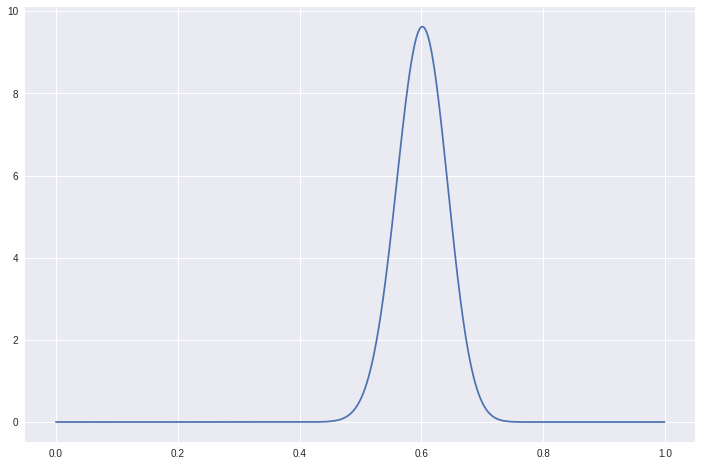

In [5]:
# How many heads more would make you believe that coin is not fair
# For example, when chance drops under 50%

heads = 29
tails = 1

posterior = beta(prior_alpha + heads, prior_beta + tails)
plt.plot(x, posterior.pdf(x))

from scipy import integrate
result = integrate.quad(lambda x: posterior.pdf(x), 0.4, 0.6)
print(result) # 29 heads = 0.495 chance of true rate of heads being between 0.4 and 0.6

Sample mean 8.20 +/- 1.07


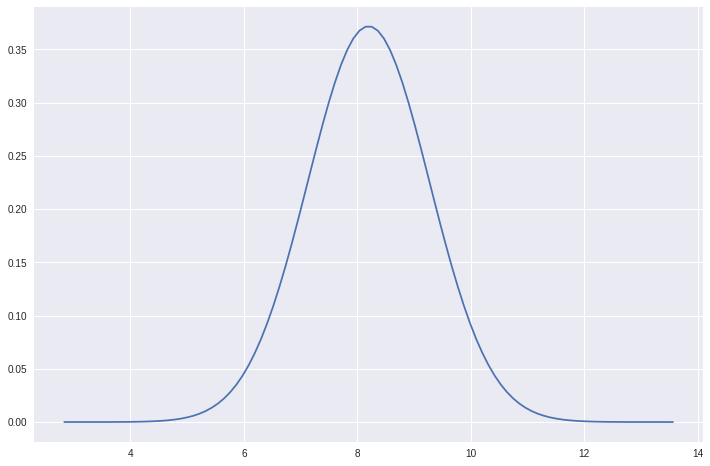

In [6]:
# Figure out the true value
observed_values = np.array([7.9, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])

# These are the only things we know so let's use normal distribution
sample_mean = observed_values.mean()
sample_deviation = observed_values.std()
print("Sample mean {:.2f} +/- {:.2f}".format(sample_mean, sample_deviation))

x_vals = np.linspace(sample_mean - 5 * sample_deviation, sample_mean + 5 * sample_deviation, 100)
pdf = norm.pdf(x_vals, sample_mean, sample_deviation)
plt.plot(x_vals, pdf)
plt.show()

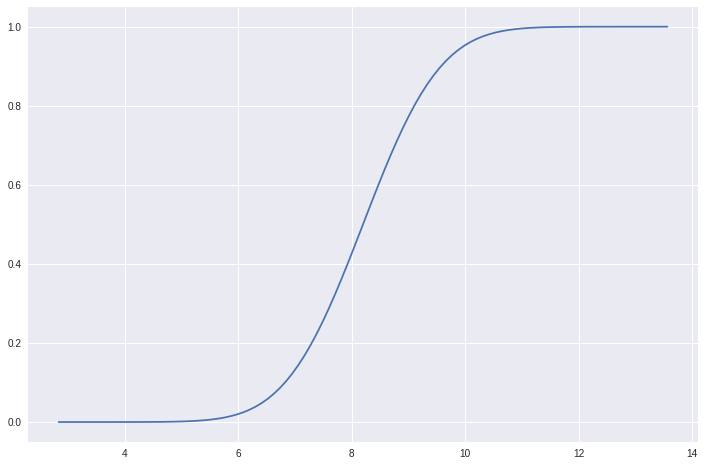

Confidence interval of 99.9 percent (4.67, 11.73)


In [7]:
# Calculate 99.9 percent confidence interval
cdf = norm.cdf(x_vals, sample_mean, sample_deviation)
plt.plot(x_vals, cdf)
plt.show()

# ppf = inverse of cdf, projection of x given y
upper_confidence_boundary = norm.ppf(1 - 0.0005, sample_mean, sample_deviation)
lower_confidence_boundary = norm.ppf(0.0005, sample_mean, sample_deviation)

print("Confidence interval of 99.9 percent ({:.2f}, {:.2f})".format(lower_confidence_boundary, upper_confidence_boundary))

Confidence interval of 95 percent (0.17938364923511183, 0.50832335380999)
Out of 40 more, the expected subscribers with 95% confidence is (7.175345969404473, 20.332934152399602)


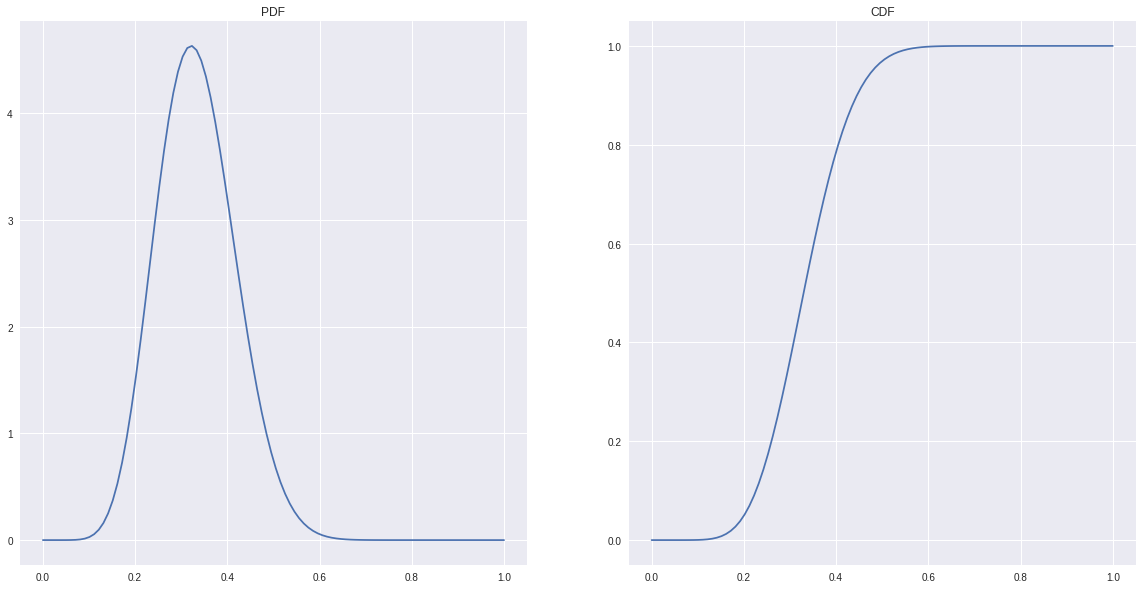

In [8]:
# 30 visitors on site
# 10 of them subscribed
# 40 more will visit, what's the 95% confidence interval for how many will still subscribe?

alpha = 10
beta_ = 20
new_ = 40

x = np.linspace(0.0, 1.0, 100)
fig, axises = plt.subplots(1, 2, figsize=(20,10))

axises[0].set_title("PDF")
axises[0].plot(x, beta.pdf(x, alpha, beta_))

axises[1].set_title("CDF")
axises[1].plot(x, beta.cdf(x, alpha, beta_))

upper_confidence_boundary = beta.ppf(1 - 0.025, alpha, beta_)
lower_confidence_boundary = beta.ppf(0.025, alpha, beta_)
print("Confidence interval of 95 percent ({}, {})".format(lower_confidence_boundary, upper_confidence_boundary))

lower_subs = new_ * lower_confidence_boundary
upper_subs = new_ * upper_confidence_boundary

print("Out of 40 more, the expected subscribers with 95% confidence is ({}, {})".format(lower_subs, upper_subs))

Text(0.5, 0, 'Probability of heads')

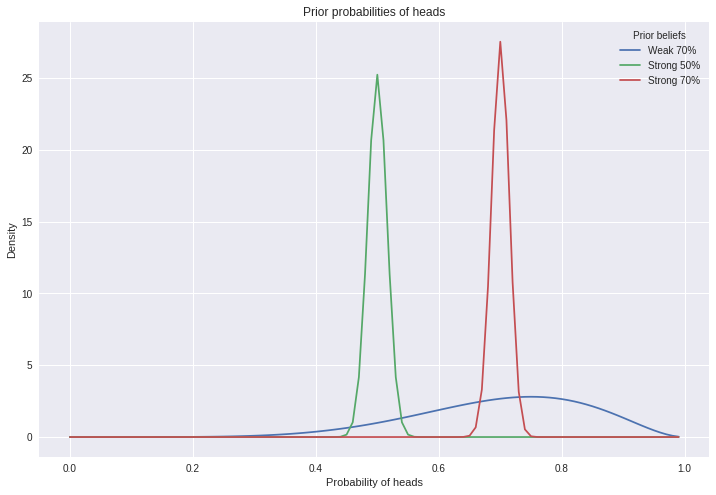

In [9]:
x = np.arange (0, 1, 0.01)

# Weak belief of 70% for head
weak_b = beta(7,3)
plt.plot(x, weak_b.pdf(x))

# Strong belief of fair coin (50%)
strong_fair_b = beta(500, 500)
plt.plot(x, strong_fair_b.pdf(x))

# Strong belief of bias (70%)
strong_bias_b = beta(700, 300)
plt.plot(x, strong_bias_b.pdf(x))

plt.title("Prior probabilities of heads")
plt.legend(["Weak 70%", "Strong 50%", "Strong 70%"], title="Prior beliefs")

plt.ylabel('Density')
plt.xlabel('Probability of heads')

Text(0.5, 0, 'Probability of heads')

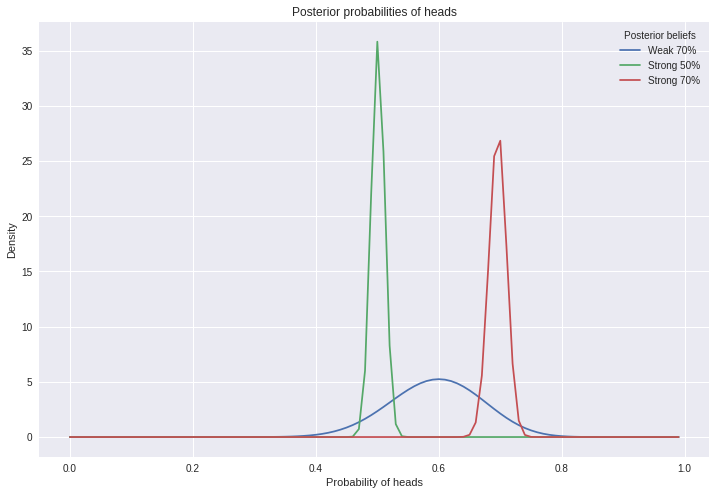

In [10]:
# First round of flips
n = 12
head = 9
tail = 3

# Second round of flips
n2 = 20
head2 = 9
tail2 = 11

total_head = 18
total_tail = 14

weak_b = beta(18 + 7, 14 + 3)
plt.plot(x, weak_b.pdf(x))

strong_fair_b = beta(18 + 1000, 14 + 1000)
plt.plot(x, strong_fair_b.pdf(x))

strong_bias_b = beta(18 + 700, 14 + 300)
plt.plot(x, strong_bias_b.pdf(x))

plt.title("Posterior probabilities of heads")
plt.legend(["Weak 70%", "Strong 50%", "Strong 70%"], title="Posterior beliefs")
plt.ylabel('Density')
plt.xlabel('Probability of heads')

In [11]:
# 95% confidence interval
weak_b_lower = beta.ppf(0.025, 18 + 7, 14 + 3)
weak_b_upper = beta.ppf(1 - 0.025, 18 + 7, 14 + 3)
print("Confidence interval for weak bias belief ({:.2f}, {:.2f})".format(weak_b_lower, weak_b_upper))

Confidence interval for weak bias belief (0.45, 0.74)


## Hypothesis testing (A/B testing)

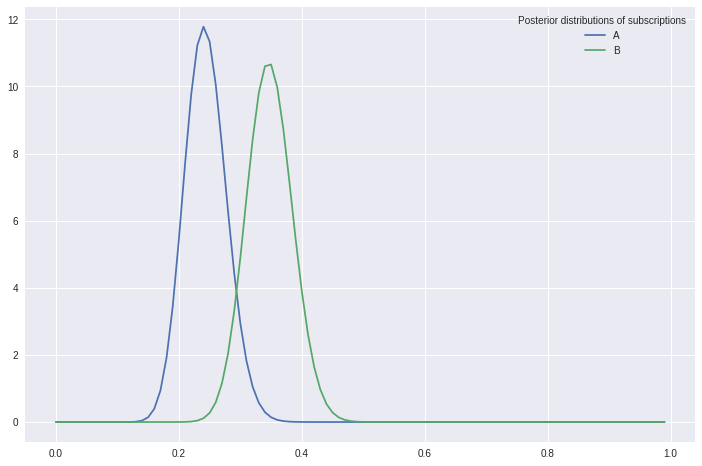

In [12]:
# Which webpage is better: A or B

# PRIOR BELIEF #
# Prior belief = 30% of the visitors will subscribe
# No data to back this up, make the belief weak by assigning small numbers for alpha and beta
prior_a = 3
prior_b = 7
prior = beta(3, 7)

# LIKELIHOOD #
# Collect the data
# 600 visitors, do A/B testing for half of them (300)
A_subscribed = 36
A_not_subscribed = 114
B_subscribed = 50
B_not_subscribed = 100

# POSTERIOR DISTRIBUTION #
# Combine prior and the data (likehood) to get the posterior
A_posterior = beta(prior_a + A_subscribed, prior_b + A_not_subscribed)
B_posterior = beta(prior_b + B_subscribed, prior_b + B_not_subscribed)

x = np.arange(0, 1, 0.01)
plt.plot(x, A_posterior.pdf(x))
plt.plot(x, B_posterior.pdf(x))
plt.legend(["A", "B"], title="Posterior distributions of subscriptions")

Site B is better with 97.97% certainty


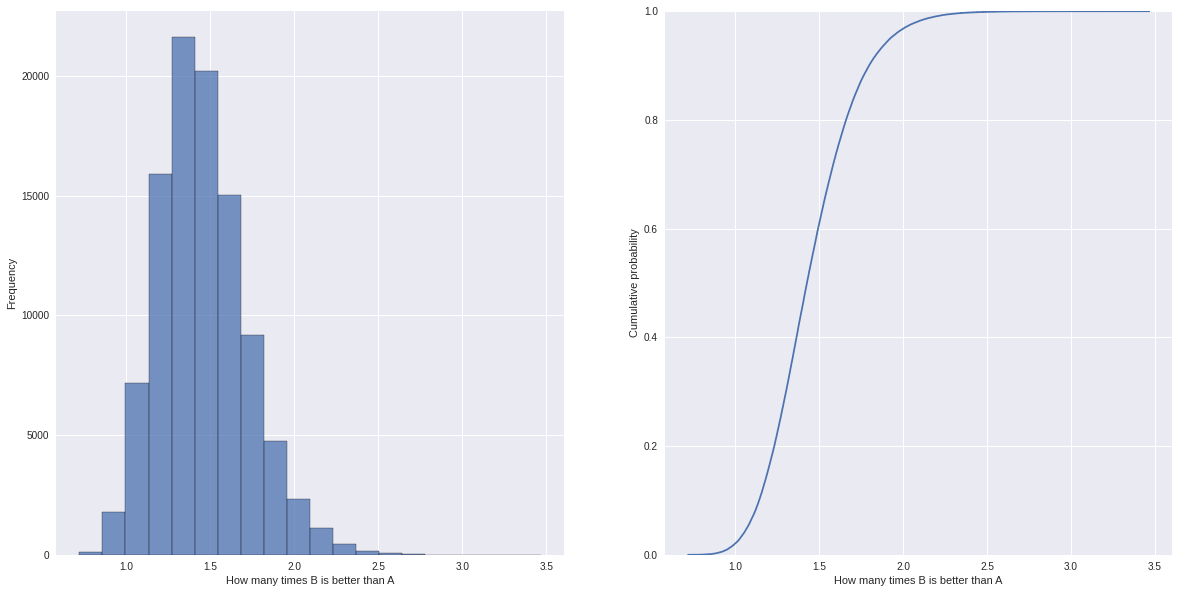

In [13]:
# MONTE CARLO SIMULATION #
# Random sample from both distribution
# Check which subscription rate is higher most of the time

sample_count = 100000
A_samples = np.random.beta(prior_a + A_subscribed, prior_b + A_not_subscribed, sample_count)
B_samples = np.random.beta(prior_b + B_subscribed, prior_b + B_not_subscribed, sample_count)

B_superior = sum(B_samples > A_samples) / sample_count

print("Site B is better with {:.2f}% certainty".format(B_superior * 100))

superiority_multiplier = B_samples / A_samples

fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.histplot(superiority_multiplier, bins=20, ax=axes[0])
axes[0].set_xlabel("How many times B is better than A")
axes[0].set_ylabel("Frequency")

axes[1].set_xlabel("How many times B is better than A")
axes[1].set_ylabel("Cumulative probability")
sns.ecdfplot(superiority_multiplier, ax=axes[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


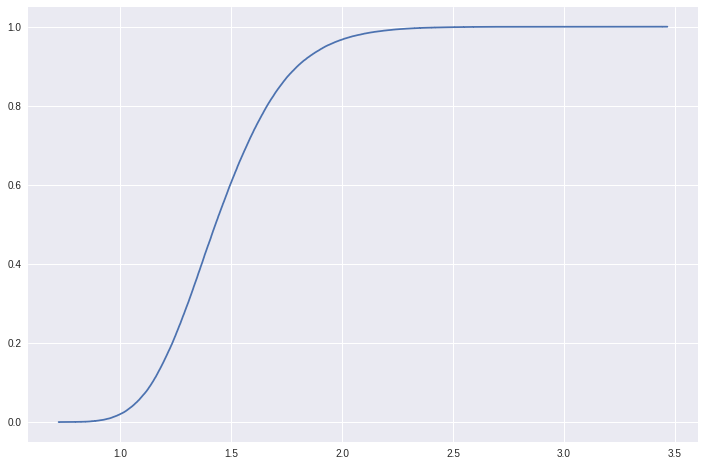

In [14]:
# Alternative way to plot ECDF with data capture
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(superiority_multiplier)
plt.step(ecdf.x,ecdf.y)

### ECDF
- Empirical cumulative distribution function (ECDF) is a CDF of empirical measurements
- It is a step function, stepping 1/n at each data point in the sample
- The y-value is the fraction of observations that are eqal or less than the specified value (x-value)
- This means that the data needs to be sorted in order to be plotted correctly

https://en.wikipedia.org/wiki/Empirical_distribution_function



[[1.  2.  3.  4.  5. ]
 [0.3 0.5 0.8 0.9 1. ]]


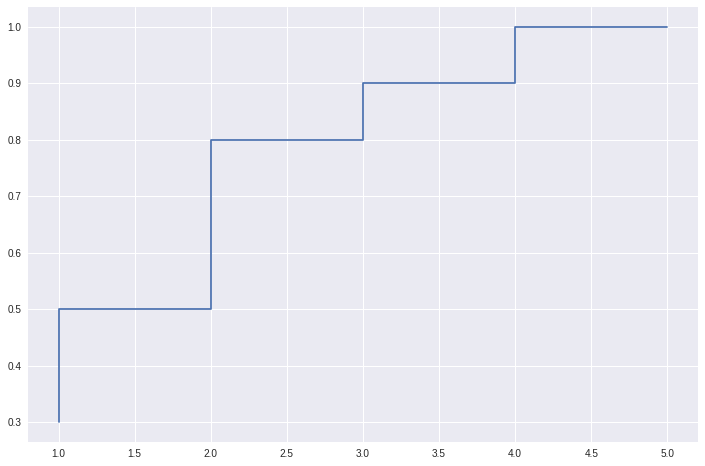

In [37]:
# ECDF implementation
def ecdf(data):
  sorted = np.sort(data)
  length = len(data)
  res = [(x, l.count(x)/length) for x in set(l)]
  sublists = list(zip(*res))
  return np.array([np.array(sublists[0]), np.cumsum(sublists[1])])

l = [1, 1, 1, 2, 2, 3, 3, 3, 4, 5]
res = ecdf(l)

print(res)
# Notice that we call step to plot the data as step function
# plot-method will always interpolate between the values unlike step
plt.step(res[0], res[1])


### Inverse of ECDF

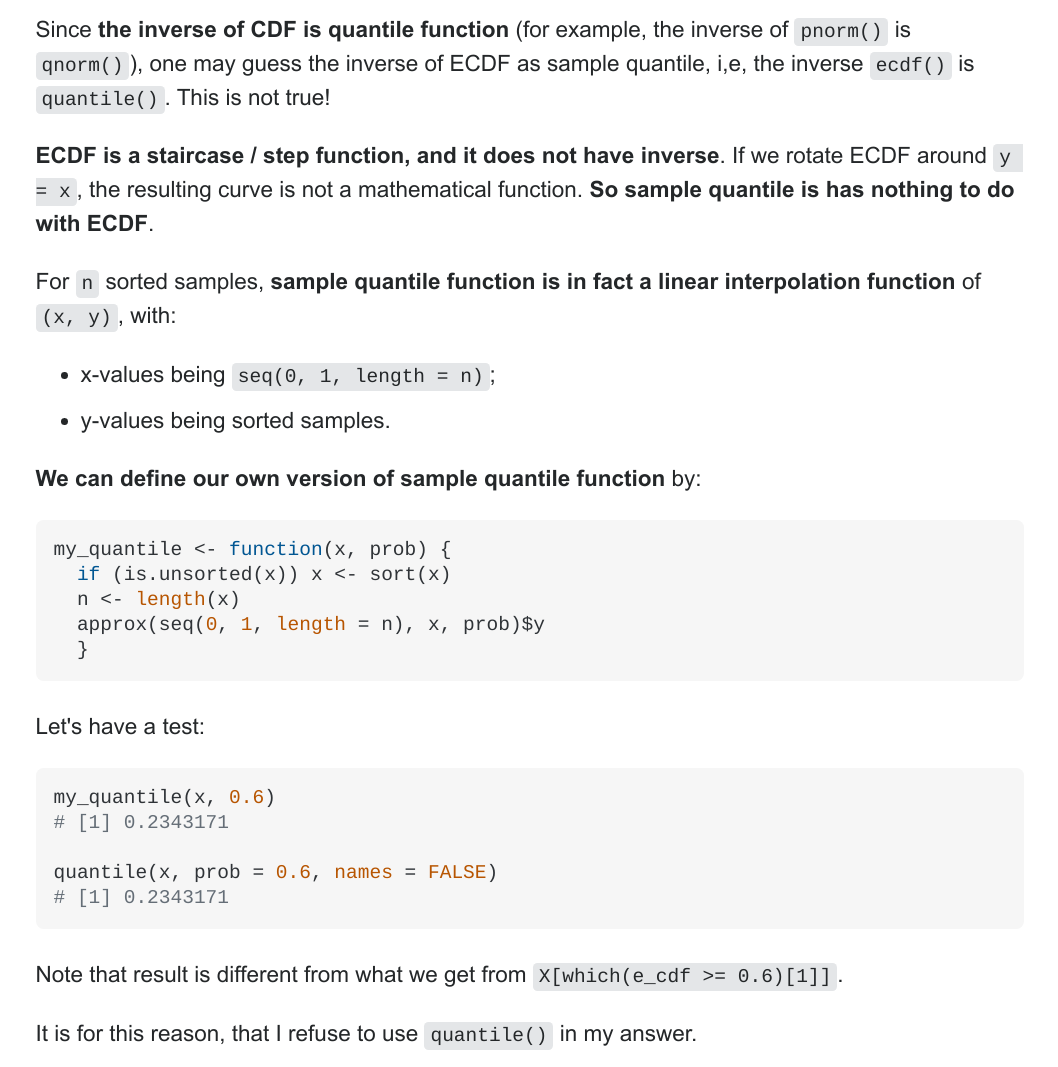





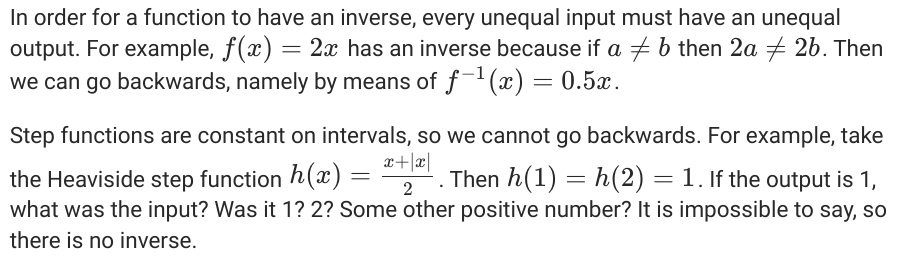

Basically, to get the quantile from ECDF distribution, you need to look for the first x-value which is equal to the y-value

In [73]:
t = res.transpose()
approx = t[t[:, 1] > 0.5][0]

print("The approximate quantile of over 50% is x={}, y={}".format(approx[0], approx[1]))

The approximate quantile of over 50% is x=3.0, y=0.8
